# Voronoi splitter script

Import modules

In [1]:
import geopandas as gpd
from voronoi_splitter import *

## Set input polygon

### **With list of coordinates as input**

In [2]:
coordinates_b = [
    (480354.5654, 9253821.1975),
    (480879.5466, 9253686.3376),
    (480709.9375, 9252855.2276),
    (480183.7994, 9252974.3195),
    (479827.2704, 9253924.5214),
    (480354.5654, 9253821.1975),
    (480183.7994, 9252974.3195),
    (479645.2393, 9253030.4658),
    (479827.2704, 9253924.5214),
    (479645.2393, 9253030.4658),
    (479131.5232, 9253212.5033),
    (479301.1323, 9254022.0480),
    (479301.1323, 9254022.0480),
    (479131.5232, 9253212.5033),
    (478605.3851, 9253282.4052),
    (478774.9942, 9254162.7052),
    (478774.9942, 9254162.7052),
    (478605.3851, 9253282.4052),
    (478069.6271, 9253414.2081),
    (478250.5672, 9254292.3471),
    (477722.7179, 9254400.8891),
    (478250.5672, 9254292.3471),
    (478069.6271, 9253414.2081),
    (477552.0354, 9253552.2003),
    (477643.5880, 9254021.8984)
]

polygon_number_db = 2

<AxesSubplot:>

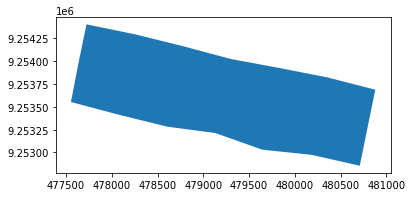

In [3]:
poly_b = polygon_from_coord(coordinates_b, mode='concave')
poly_b = gpd.GeoDataFrame(geometry=gpd.GeoSeries(poly_b, crs=32718))

poly_b['pol_id'] = polygon_number_db
poly_b.plot()

## Applies "voronoi_splitter" function and retrieves the result in an object called "result"

The arguments of the function voronoi_splitter are:
- Input polygon as a geopandas object
- Number of sub-polygons for the output (the number of smaller polygons requested as an output)
- CRS (coordinate reference system) of the input
- Number of random points used to build the Voronoi's polygons, the bigger the number the less variance in the areas of the resulting polygons (but also a big number of point can make the function slow, and eventually break the procces)
- The seed is just for make reproductible the random point generation, does't matter in this case and is set by default to 1

### Polygon B (south)

In [4]:
# define mean wanted area for the subpolygons
subpoly_brea = 10000

print('Polygon area: {} sq. mt'.format(round(poly_b.area.values[0])))

n_subpolygons = round(poly_b.area.values[0]/subpoly_brea)
n_subpolygons

Polygon area: 2833575 sq. mt


283

In [5]:
# adds NFTs ID
result_b = voronoi_splitter(poly_b, 238, crs='EPSG:32718', npoints=90000, seed=1, offset_id=0)
result_b['nft_id'] = nft_id(result_b, 'pol_id', 'subpol_id')

# adds image path
ndt_images_path = nft_images(result_b, 'subpol_id')
result_b['gridview_img'] = ndt_images_path[0]
result_b['zoomview_img'] = ndt_images_path[1]

result_b.head(2)

A total of 238 polygons where created.
Areas range from 8899 to 15325 square meters
The mean area is 11906 square meters


pol_id                                           geometry  subpol_id  \
0       2  POLYGON ((-75.17382 -6.75272, -75.17413 -6.752...          1   
1       2  POLYGON ((-75.17492 -6.75642, -75.17463 -6.755...          2   

      area  centroid_x  centroid_y     nft_id  \
0  11857.2  -75.173571   -6.752186  #002-0001   
1   9356.9  -75.174346   -6.756195  #002-0002   

                        gridview_img                       zoomview_img  
0  /_img/gridview/gridview_img_1.jpg  /_img/zoomview/zoomview_img_1.jpg  
1  /_img/gridview/gridview_img_2.jpg  /_img/zoomview/zoomview_img_2.jpg

<AxesSubplot:>

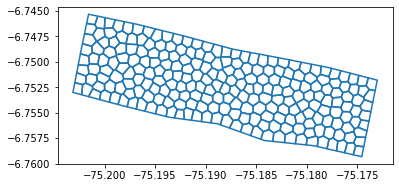

In [6]:
result_b.boundary.plot()

Histogram was saved to output_data/nft_002_hist.jpg
count      238.000000
mean     11905.778992
std       1019.550223
min       8898.700000
25%      11230.675000
50%      11920.200000
75%      12610.100000
max      15324.700000
Name: area, dtype: float64
Descriptive statistics were saved to output_data/nft_002_hist.csv


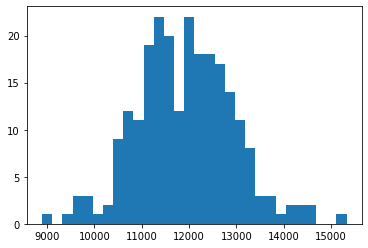

In [7]:
description(result_b, 'nft_002_hist', folder='output_data')

### Saves data

In [8]:
result_b.to_file('output_data/002_nft.geojson', driver='GeoJSON')

In [9]:
polygons_utm = result_b.to_crs(32718)
polygons_utm.to_file('output_data/002_nft_utm.geojson', driver='GeoJSON')

In [10]:
result_columns =  ['nft_id', 'pol_id', 'subpol_id', 'area', 'coordinates', 'centroid']
json_writer('output_data/002_nft.json', result_b, result_columns)

JSON file was writen in output_data/002_nft.json


In [11]:
result_b.to_excel('output_data/002_nft_data.xlsx', index=False)